# Demo of data conversion
- Case #1 demonstrates the conversion of discharge voltage-capacity data to capcity-rate data
- Case #2 demonstrates the conversion of capacity cycling data to capacity-rate data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../batteryratecap')
import data_converter

In [2]:
%matplotlib inline

## Case # 1
### Discharge curve &#8594; Capacity rate curve
### E vs Li (<font color=red>V</font>) vs Capacity (<font color=red>Ah cm<sup>-2</sup></font>) &#8594; Capacity (<font color=red>Ah cm<sup>-2</sup></font>) vs i (<font color=red>$\mu A$ cm <sup>-2</sup></font>)

### Step 1) Upload and convert potential vs capacity data

In [3]:
input_file_path = '../doc/Data/performancelog.xls'
output_file_path = '../doc/Data/export_capcaity_rate_single_case.xlsx'

# These are the sheets in the inpur file whose datasets will be considered
sheet_name = ['0.5C_discharge', '1C_discharge', '2C_discharge', '5C_discharge']

# rates = { "C rate": sheet_name}
# c_rate = pd.DataFrame(rates)

df_cap_rate = data_converter.potential_rate_paper_set(input_file_path, sheet_name, output_file_path, 'Paper # 32', 3)
print('This returns the capacity-rate data for the 3 sets from Paper # 32 run at C-rates from 0.5C to 5C')
df_cap_rate

saved succesfully to../doc/Data/export_capcaity_rate_single_case.xlsx
This returns the capacity-rate data for the 3 sets from Paper # 32 run at C-rates from 0.5C to 5C


,C rate,Capacity (mAh/g),C rate,Capacity (mAh/g),C rate,Capacity (mAh/g)
0,0.5,154.154324,0.5,147.303752,0.5,144.812819
1,1,149.841197,1,139.399821,1,135.372662
2,2,141.685172,2,118.804436,2,116.264876
3,5,110.398826,5,65.780351,5,48.477729


In [4]:
input_file_path = '../doc/Data/voltage_capacity_by_c-rate.xls'
output_file_path = '../doc/Data/export_capacity_rate_all.xlsx'
data_converter.potential_rate_all(input_file_path, output_file_path)

Paper # 14                  Paper # 31                          \
      set #8                      set #1                  set #2   
      C-rate Capacity (mAh/g)     C-rate Capacity (mAh/g) C-rate   
0        0.5       114.705626        0.5       299.017267    0.5   
1        NaN              NaN          5       243.146549      5   
2        NaN              NaN         10        80.641691     10   
3        NaN              NaN        NaN              NaN    NaN   
4        NaN              NaN        NaN              NaN    NaN   
5        NaN              NaN        NaN              NaN    NaN   
6        NaN              NaN        NaN              NaN    NaN   
7        NaN              NaN        NaN              NaN    NaN   

                   Paper # 32                                           ...  \
                       set #1                  set #2                   ...   
  Capacity (mAh/g)     C-rate Capacity (mAh/g) C-rate Capacity (mAh/g)  ...   
0       272.404372        0.5       154.154324    0.5       147.303752  ...   
1       205.740927          1       149.841197      1       139.399821  ...   
2       129.867125          2       141.685172      2       118.804436  ...   
3              NaN          5       110.398826      5        65.780351  ...   
4              NaN        0.5       153.813814    0.5       147.077925  ...   
5              NaN          1       149.841197      1       139.038499  ...   
6              NaN          2       142.009467      2       119.075427  ...   
7              NaN          5       113.784796      5        68.716096  ...   

  Paper # 19                  Paper # 3                  Paper # 2  \
     set # 1                     set #1                     set #1   
      C-rate Capacity (mAh/g)    C-rate Capacity (mAh/g)    C-rate   
0          5       144.349315       0.5       337.494850         1   
1        NaN              NaN         1       331.593507       NaN   
2        NaN              NaN       NaN              NaN       NaN   
3        NaN              NaN       NaN              NaN       NaN   
4        NaN              NaN       NaN              NaN       NaN   
5        NaN              NaN       NaN              NaN       NaN   
6        NaN              NaN       NaN              NaN       NaN   
7        NaN              NaN       NaN              NaN       NaN   

                                           Paper # 29                   
                   set #2                      set #1                   
  Capacity (mAh/g) C-rate Capacity (mAh/g)     C-rate Capacity (mAh/g)  
0       332.354562      1       314.798168          1       116.307983  
1              NaN    NaN              NaN        NaN              NaN  
2              NaN    NaN              NaN        NaN              NaN  
3              NaN    NaN              NaN        NaN              NaN  
4              NaN    NaN              NaN        NaN              NaN  
5              NaN    NaN              NaN        NaN              NaN  
6              NaN    NaN              NaN        NaN              NaN  
7              NaN    NaN              NaN        NaN              NaN  

[8 rows x 24 columns]

## Case # 2
### Rate test data &#8594; Capacity rate curve
### Capacity (<font color=red>Ah cm<sup>-2</sup></font>) vs Cycle #  &#8594; Capacity (<font color=red>Ah cm<sup>-2</sup></font>) vs i (<font color=red>$\mu A$ cm <sup>-2</sup></font>)

###### Loading in excel files

In [5]:
battery_performance = pd.read_excel('../doc/Data/performancelog.xls', sheet_name = None, header=[0, 1, 2])
battery_performance_sheet_names = pd.ExcelFile('../doc/Data/performancelog.xls').sheet_names

###### Creating a different df for each excel sheet in the file

In [6]:
for i, j in enumerate(battery_performance_sheet_names):
    globals()[f'battery_performance_{j}'] = battery_performance[battery_performance_sheet_names[i]]

###### Previewing the dataframe

In [7]:
battery_performance_CapacityCycle.head(7)

Paper # 1                  Paper # 2                             \
   Set #1 E                   Set #1 E                   Set #2 E   
    Cycle # Capacity (mAh/g)   Cycle # Capacity (mAh/g)   Cycle #   
0  0.185615       122.911465  1.021898       249.145299  0.948905   
1  1.670534       127.179225  1.897810       197.863248  2.043796   
2  2.969838       119.497258  3.065693       199.572650  2.992701   
3  3.897912       110.961740  4.014599       214.957265  3.868613   
4  5.011601       109.681412  4.963504       261.965812  4.963504   
5  6.125290       110.108188  5.912409       331.196581  5.985401   
6  6.867749       110.961740  6.715328       329.487179  6.934307   

                                                                          ...  \
                    Set #3 E                   Set #4 E                   ...   
  Capacity (mAh/g)   Cycle # Capacity (mAh/g)   Cycle # Capacity (mAh/g)  ...   
0       150.000000  0.912162        70.588235  0.979730        84.873950  ...   
1       129.487179  1.925676        36.554622  1.858108        40.336134  ...   
2       124.358974  3.006757        35.714286  2.939189        42.016807  ...   
3       127.777778  3.885135        35.714286  4.020270        43.277311  ...   
4       130.341880  4.898649        35.294118  4.898649        40.336134  ...   
5       130.341880  5.912162        35.294118  5.979730        50.000000  ...   
6       173.931624  7.060811        40.756303  6.993243        47.058824  ...   

  Paper #29                  Paper #32                              \
   Set #1 E                   Set #1 E                    Set #2 E   
    Cycle # Capacity (mAh/g)   Cycle # Capacity (mAh/g)    Cycle #   
0  1.008547       117.083333  0.970927       173.078008  12.054231   
1  2.017094        96.250000  2.000792       159.745980  13.035055   
2  3.008547       101.805556  3.030656       157.778195  14.064919   
3  4.034188       104.583333  3.962438       157.708333  15.045742   
4  4.991453       105.972222  5.074038       156.485746  19.067118   
5  6.000000       108.194444  6.022167       154.448099  20.096983   
6  7.008547       108.472222  7.002991       153.516604  21.077806   

                                                                            
                    Set #3 E                                                
  Capacity (mAh/g)   Cycle # Capacity (mAh/g) Cycle #.1 Capacity (mAh/g).1  
0       135.951262  0.970927       158.406955       NaN                NaN  
1       135.402345  2.000792       149.848841       NaN                NaN  
2       135.527099  2.981615       148.800909       NaN                NaN  
3       135.585317  3.962438       148.509816       NaN                NaN  
4       116.547880  4.992303       147.857769       NaN                NaN  
5       116.190252  6.022167       144.026995       NaN                NaN  
6        73.075322  7.002991       142.746188       NaN                NaN  

[7 rows x 30 columns]

###### Get the paper and set index for each pair of data in the df

In [8]:
papers = np.array(battery_performance_CapacityCycle.columns.get_level_values(0))
papers = papers[0:-1:2]
    
sets = np.array(battery_performance_CapacityCycle.columns.get_level_values(1))
sets = sets[0:-1:2]

###### Creating seperate numpy arrays of each pair of data with the name of the variable as the paper and set ID

In [9]:
# Initialize list of all paperX_setX which can be saved as the input for the ipywidget below
list_of_papers_sets = []

for i,j in zip(papers,sets):

        
    globals()[f'capacity_{i}_{j}'] = np.array(battery_performance_CapacityCycle[i][j])
    globals()[f'capacity_{i}_{j}'] = globals()[f'capacity_{i}_{j}'][~np.isnan(globals()[f'capacity_{i}_{j}'])]
    globals()[f'capacity_{i}_{j}'] = globals()[f'capacity_{i}_{j}'].reshape(-1,2)
    
    # Keep track of list of unique paper/set 
    list_of_papers_sets.append(f'capacity_{i}_{j}')

In [10]:
list_of_papers_sets

['capacity_Paper # 1_Set #1 E',
 'capacity_Paper # 2_Set #1 E',
 'capacity_Paper # 2_Set #2 E',
 'capacity_Paper # 2_Set #3 E',
 'capacity_Paper # 2_Set #4 E',
 'capacity_Paper #3_Set #1 E',
 'capacity_Paper #4_Set #1 E',
 'capacity_Paper #4_Set #2 E',
 'capacity_Paper #4_Set #3 E',
 'capacity_Paper #19_Set #1 E',
 'capacity_Paper #29_Set #1 E',
 'capacity_Paper #32_Set #1 E',
 'capacity_Paper #32_Set #2 E',
 'capacity_Paper #32_Set #3 E',
 'capacity_Paper #32_Set #3 E']

###### Select ONE paper and run the cell. If you want to see a different paper/set, re-run the cell starting below

In [11]:
user_selected_paper = widgets.SelectMultiple(
    options=list_of_papers_sets,
    #value = ,
    rows=10,
    description='Select paper',
    disabled=False
)

In [12]:
#### NOTE: Run this cell, then select ONE option and run the cell again and make sure your selection is correctly output below
#### if you wish to select a different paper/set, run the cell above first!
user_selected_paper

SelectMultiple(description='Select paper', options=('capacity_Paper # 1_Set #1 E', 'capacity_Paper # 2_Set #1 …

In [14]:
user_selected_paper = user_selected_paper.value[0]
user_selected_paper

'capacity_Paper # 1_Set #1 E'

<function matplotlib.pyplot.show(close=None, block=None)>

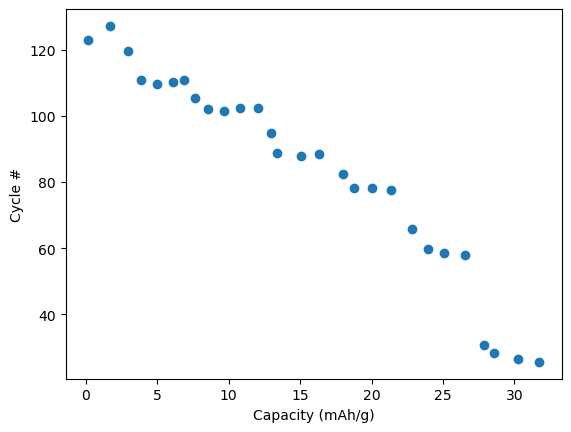

In [15]:
plt.scatter(globals()[user_selected_paper][:,0], globals()[user_selected_paper][:,1])
plt.xlabel("Capacity (mAh/g)")
plt.ylabel("Cycle #")
plt.show

In [16]:
current_list = [50, 250, 500, 1000, 1500, 2500, 5000] # units in µA/cm²

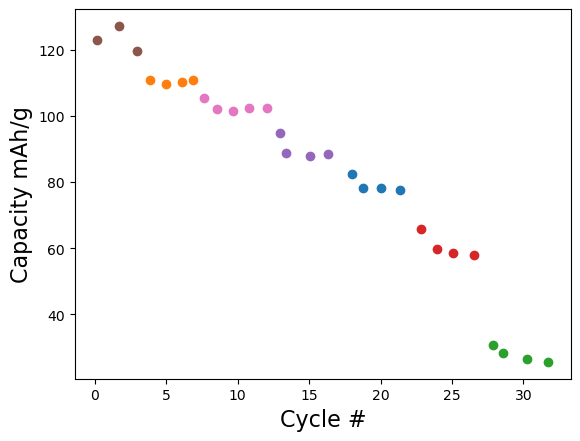

In [17]:
capacity_cycle_array = globals()[user_selected_paper]
df = data_converter.capacity_cycle(capacity_cycle_array, 7, current_list, '(µA/cm²)', 'mAh/g')

In [ ]:
df